# First steps in pandas

*This very short introduction to pandas is mainly based on the excellent [pandas documentation](https://pandas.pydata.org/docs/user_guide/10min.html).*

To use this tutorial, I recommend the following procedure:

1. On your machine, create a new folder called `pandas`
1. Download this tutorial as .ipynb (on the top right of this webpage, select the download button) and move it to your `pandas` folder
1. Open Visual Studio Code and select the "Explorer" symbol on the top left in the [Activity Bar](https://code.visualstudio.com/docs/getstarted/userinterface)
1. Select "Open Folder" and choose your folder `pandas`. This folder is now your project directory
1. In the Explorer, open the file `pandas-intro-short.ipynb`

## Import pandas

- To load the pandas package and start working with it, import the package. 
- The community agreed alias for pandas is `pd`, so loading pandas as pd is assumed standard practice for all of the pandas documentation:

In [1]:
import pandas as pd

## Data creation

- To manually store data in a table, create a DataFrame:

In [2]:
# create the DataFrame and name it my_df

my_df = pd.DataFrame(
    { 
        'name': [ "Tom", "Lisa", "Peter"],
        'height': [1.68, 1.93, 1.72],
        'weight': [48.4, 89.8, 84.2],
        'gender': ['male', 'female', 'male'] 
        }
)

In [3]:
# show my_df
my_df

,name,height,weight,gender
0,Tom,1.68,48.4,male
1,Lisa,1.93,89.8,female
2,Peter,1.72,84.2,male


## Import data

![](https://pandas.pydata.org/docs/_images/02_io_readwrite.svg)

- pandas supports many different file formats or data sources out of the box (csv, excel, sql, json, parquet, …)
- each of them import data with the prefix `read_*`
- Import data, available as a CSV file in a GitHub repo:

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/modern-statistics/main/data/height.csv")

# show head
df.head()

,Name,ID%,Height,Average Height Parents,Gender
0,Stefanie,1,162,161.5,female
1,Peter,2,163,163.5,male
2,Stefanie,3,163,163.2,female
3,Manuela,4,164,165.1,female
4,Simon,5,164,163.2,male


In [5]:
# same import with different style

ROOT = "https://raw.githubusercontent.com/kirenz/modern-statistics/main/data/"
DATA = "height.csv"

df = pd.read_csv(ROOT + DATA)

# show head
df.head()

,Name,ID%,Height,Average Height Parents,Gender
0,Stefanie,1,162,161.5,female
1,Peter,2,163,163.5,male
2,Stefanie,3,163,163.2,female
3,Manuela,4,164,165.1,female
4,Simon,5,164,163.2,male


## Store data

- pandas supports many different file formats (csv, excel, sql, json, parquet, …)
- each of them stores data with the prefix `to_*`
- The following code will save data as an Excel file in your current directory (you may need to install [OpenPyXL](https://openpyxl.readthedocs.io/en/stable/) first. 

:::{note}
[Anaconda installation of OpenPyXL](https://anaconda.org/anaconda/openpyxl)):
:::

- In the example here, the `sheet_name` is named people_height instead of the default Sheet1. By setting `index=False` the row index labels are not saved in the spreadsheet:

In [6]:
df.to_excel("height.xlsx", sheet_name="people_height", index=False)

- The equivalent read function `read_excel()` would reload the data to a DataFrame:

In [7]:
# load excel file
df_new = pd.read_excel("height.xlsx", sheet_name="people_height")

## Viewing data

### Overview

In [8]:
# show df
df

,Name,ID%,Height,Average Height Parents,Gender
0,Stefanie,1,162,161.5,female
1,Peter,2,163,163.5,male
2,Stefanie,3,163,163.2,female
3,Manuela,4,164,165.1,female
4,Simon,5,164,163.2,male
5,Sophia,6,164,164.4,female
6,Ellen,7,164,164.0,female
7,Emilia,8,165,165.2,female
8,Lina,9,165,165.2,female
9,Marie,10,165,165.1,female


In [9]:
# show first 2 rows
df.head(2)

,Name,ID%,Height,Average Height Parents,Gender
0,Stefanie,1,162,161.5,female
1,Peter,2,163,163.5,male


In [10]:
# show last 2 rows
df.tail(2)

,Name,ID%,Height,Average Height Parents,Gender
18,Steven,19,167,167.3,male
19,Emanuel,20,168,168.5,male


- The `info()` method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    20 non-null     object 
 1   ID%                     20 non-null     int64  
 2   Height                  20 non-null     int64  
 3   Average Height Parents  20 non-null     float64
 4    Gender                 20 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 928.0+ bytes


### Column names

In [12]:
# Show columns
df.columns

Index(['Name', 'ID%', 'Height', 'Average Height Parents', ' Gender'], dtype='object')

### Data type

- Show data types ([dtypes](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes)).

In [13]:
df.dtypes

Name                       object
ID%                         int64
Height                      int64
Average Height Parents    float64
 Gender                    object
dtype: object

- The data types in this DataFrame are integers (int64), floats (float64) and strings (object).

### Index

In [14]:
# Only show index
df.index

RangeIndex(start=0, stop=20, step=1)

## Change column names

- Usually, we prefer to work with columns that have the following proporties:
  - no leading or trailing whitespace (`"name"` instead of `" name "`, `" name"` or `"name "`)
  - all lowercase (`"name"` instead of `"Name"`)
  - now white spaces (`"my_name"` instead of `"my name"`)

### Simple rename

- First, we rename columns by simply using a mapping
- We rename `"Name"` to `"name"` and just print the result (we want to display errors and don't save the changes for now):

In [15]:
df.rename(columns={"Name": "name"}, errors="raise")

,name,ID%,Height,Average Height Parents,Gender
0,Stefanie,1,162,161.5,female
1,Peter,2,163,163.5,male
2,Stefanie,3,163,163.2,female
3,Manuela,4,164,165.1,female
4,Simon,5,164,163.2,male
5,Sophia,6,164,164.4,female
6,Ellen,7,164,164.0,female
7,Emilia,8,165,165.2,female
8,Lina,9,165,165.2,female
9,Marie,10,165,165.1,female


- Let`s rename Gender to gender
- Again, we just want to display the result (without saving it).
- Remove the # and run the following code:

In [16]:
# df.rename(columns={"Gender": "gender"}, errors="raise")

- This raises an error. Can you spot the problem? (take a look at the end of the error statement)
- The KeyError statement tells us that `"['Gender'] not found in axis"`
- This is because variable Gender has a white space at the beginning: `[ Gender]`
- We could fix this problem by typing `" Gender"` instead of `"Gender"`
- However, there are useful functions (regular expressions) to deal with this kind of problems

### Trailing and leading spaces (with regex)

- We use regular expressions to deal with whitespaces
- To change multiple column names at once, we use the method `.columns.str` 
- To replace the spaces, we use `.replace()` with `regex=True`
- In the following function, we search for leading (line start and spaces) and trailing (spaces and line end) spaces and replace them with an empty string:

In [17]:
# replace r"this pattern" with empty string r""
df.columns = df.columns.str.replace(r"^ +| +$", r"", regex=True)

Explanation for the regex (see also [Stackoverflow](https://stackoverflow.com/a/67466222)):

- we start with `r` (for raw) which tells Python to treat all following input as raw text (without interpreting it)
- "`^`": is line start
- "` +`": (space and plus) is one or more spaces
- "`|`": is or
- "`$`": is line end


To learn more about regular expressions ("regex"), visit the following sites:

- [regular expression basics](https://www.w3schools.com/python/python_regex.asp).
- [interactive regular expressions tool](https://regex101.com/)

### Replace special characters

- Again, we use regular expressions to deal with special characters (like %, &, $ etc.)

In [18]:
# replace r"this pattern" with empty string r""
df.columns = df.columns.str.replace(r"%", r"", regex=True)

df.columns

Index(['Name', 'ID', 'Height', 'Average Height Parents', 'Gender'], dtype='object')

### Lowercase and whitespace

- We can use two simple methods to convert all columns to lowercase and replace white spaces with underscores ("_"):

In [19]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

df.columns

Index(['name', 'id', 'height', 'average_height_parents', 'gender'], dtype='object')

## Change data type

- There are several methods to [change data types in pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html):

  - `.astype()`: Convert to a specific type (like "int32", "float" or "catgeory")
  - `to_datetime`: Convert argument to datetime.
  - `to_timedelta`: Convert argument to timedelta.
  - `to_numeric`: Convert argument to a numeric type.
  - `numpy.ndarray.astype`: Cast a numpy array to a specified type.

### Categorical data

- Categoricals are a pandas data type corresponding to categorical variables in statistics. 

- A categorical variable takes on a limited, and usually fixed, number of possible values (categories). Examples are gender, social class, blood type, country affiliation, observation time or rating via Likert scales.

- Converting an existing column to a category dtype:

In [20]:
df["gender"] = df["gender"].astype("category")

df.dtypes

name                        object
id                           int64
height                       int64
average_height_parents     float64
gender                    category
dtype: object

### String data

- In our example, id is not a number (we can't perform calculations with it)
- It is just a unique identifier so we should transform it to a simple string (object)

In [21]:
df['id'] = df['id'].astype(str)

df.dtypes

name                        object
id                          object
height                       int64
average_height_parents     float64
gender                    category
dtype: object

## Add new columns

### Constant

In [22]:
# add a constant to all rows
df["number"] = 42

df.head(3)

,name,id,height,average_height_parents,gender,number
0,Stefanie,1,162,161.5,female,42
1,Peter,2,163,163.5,male,42
2,Stefanie,3,163,163.2,female,42


### From existing

 - Create new column from existing columns

In [23]:
import numpy as np

# calculate height in m (from cm)
df['height_m'] = df.height/100 

# add some random numbers
df['weight'] = round(np.random.normal(45, 5, 20) * df['height_m'],2)

# calculate body mass index
df['bmi'] = round(df.weight / (df.height_m * df.height_m),2)

### Date

- To add a date, we can use datetime and [strftime](https://strftime.org):

In [24]:
# add date
from datetime import datetime

df["date"] = datetime.today().strftime('%Y-%m-%d')

df.head(3)

,name,id,height,average_height_parents,gender,number,height_m,weight,bmi,date
0,Stefanie,1,162,161.5,female,42,1.62,75.31,28.70,2022-05-19
1,Peter,2,163,163.5,male,42,1.63,82.24,30.95,2022-05-19
2,Stefanie,3,163,163.2,female,42,1.63,77.06,29.00,2022-05-19


## Summary statistics

### Numeric data

- [describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe) shows a quick statistic summary of your numerical data.
- We transpose the data (with `.T`) to make it more readable: 

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
height,20.0,165.0000,1.486784,162.00,164.0000,165.000,166.0000,168.00
average_height_parents,20.0,165.3500,1.687883,161.50,164.3000,165.350,166.3500,168.50
number,20.0,42.0000,0.000000,42.00,42.0000,42.000,42.0000,42.00
height_m,20.0,1.6500,0.014868,1.62,1.6400,1.650,1.6600,1.68
weight,20.0,74.9345,7.883345,61.53,69.5675,75.345,81.2825,90.80
bmi,20.0,27.5300,2.926541,22.60,25.5125,28.080,29.4650,32.95


- Obtain summary statistics for different groups (categorical data)

In [26]:
df.groupby(['gender']).describe().T

gender                            female        male
height                 count   11.000000    9.000000
                       mean   164.363636  165.777778
                       std      1.120065    1.563472
                       min    162.000000  163.000000
                       25%    164.000000  165.000000
                       50%    165.000000  166.000000
                       75%    165.000000  167.000000
                       max    166.000000  168.000000
average_height_parents count   11.000000    9.000000
                       mean   164.863636  165.944444
                       std      1.593909    1.693451
                       min    161.500000  163.200000
                       25%    164.200000  165.500000
                       50%    165.100000  166.200000
                       75%    165.650000  166.600000
                       max    167.400000  168.500000
number                 count   11.000000    9.000000
                       mean    42.000000   42.000000
                       std      0.000000    0.000000
                       min     42.000000   42.000000
                       25%     42.000000   42.000000
                       50%     42.000000   42.000000
                       75%     42.000000   42.000000
                       max     42.000000   42.000000
height_m               count   11.000000    9.000000
                       mean     1.643636    1.657778
                       std      0.011201    0.015635
                       min      1.620000    1.630000
                       25%      1.640000    1.650000
                       50%      1.650000    1.660000
                       75%      1.650000    1.670000
                       max      1.660000    1.680000
weight                 count   11.000000    9.000000
                       mean    73.505455   76.681111
                       std      6.837181    9.106351
                       min     61.530000   62.360000
                       25%     70.785000   69.470000
                       50%     75.310000   81.170000
                       75%     77.290000   82.240000
                       max     84.210000   90.800000
bmi                    count   11.000000    9.000000
                       mean    27.210909   27.920000
                       std      2.542752    3.456577
                       min     22.600000   22.630000
                       25%     26.160000   25.490000
                       50%     28.030000   29.100000
                       75%     28.850000   30.350000
                       max     30.930000   32.950000

### Categorical data

- we can also use `describe()` for categorical data

In [27]:
df.describe(include="category").T

,count,unique,top,freq
gender,20,2,female,11


- Show unique levels and count with `value_counts()`

In [28]:
df['gender'].value_counts()

female    11
male       9
Name: gender, dtype: int64

### Loop over list

- Example of for loop to obtain statistics for specific numerical columns

In [36]:
# make a list of numerical columns
list_num = ['height', 'weight']

In [50]:
# calculate median for our list
for i in list_num:
    print(f'Median of {i} equals {df[i].median()} \n')

Median of height equals 165.0   

Median of weight equals 75.345   



In [46]:
# calculate summary statistics for our list
for i in list_num:
    print(f'Column: {i}  \n  {df[i].describe().T}   \n')

Column: height  
  count     20.000000
mean     165.000000
std        1.486784
min      162.000000
25%      164.000000
50%      165.000000
75%      166.000000
max      168.000000
Name: height, dtype: float64   

Column: weight  
  count    20.000000
mean     74.934500
std       7.883345
min      61.530000
25%      69.567500
50%      75.345000
75%      81.282500
max      90.800000
Name: weight, dtype: float64   



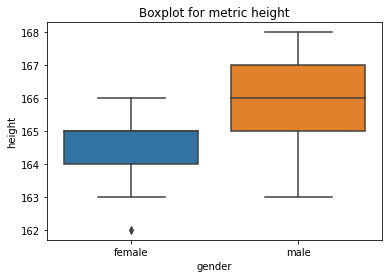

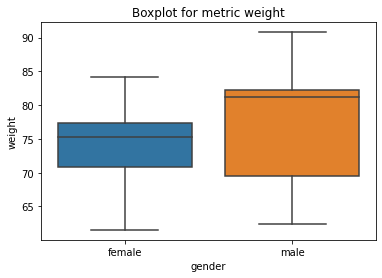

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# obtain plots for our list
for i in list_num:
    sns.boxplot(x="gender", y=i, data=df)
    plt.title("Boxplot for metric " + i)
    plt.show()

## Sorting

Sorting by values:

In [133]:
df.sort_values(by="height")

,name,id,height,average_height_parents,gender,number,height_m,weight,bmi,date
0,Stefanie,1,162,161.5,female,42,1.62,78.85,30.04,2022-03-25
1,Peter,2,163,163.5,male,42,1.63,79.50,29.92,2022-03-25
2,Stefanie,3,163,163.2,female,42,1.63,68.41,25.75,2022-03-25
3,Manuela,4,164,165.1,female,42,1.64,71.54,26.60,2022-03-25
4,Simon,5,164,163.2,male,42,1.64,75.44,28.05,2022-03-25
5,Sophia,6,164,164.4,female,42,1.64,78.38,29.14,2022-03-25
6,Ellen,7,164,164.0,female,42,1.64,86.48,32.15,2022-03-25
12,Fin,13,165,165.5,male,42,1.65,60.54,22.24,2022-03-25
11,Mila,12,165,167.4,female,42,1.65,62.26,22.87,2022-03-25
10,Lena,11,165,166.3,female,42,1.65,75.32,27.67,2022-03-25


## Selection

### Getting []

Selecting a single column (equivalent to `df.height`):

In [134]:
df["height"]

0     162
1     163
2     163
3     164
4     164
5     164
6     164
7     165
8     165
9     165
10    165
11    165
12    165
13    166
14    166
15    166
16    166
17    167
18    167
19    168
Name: height, dtype: int64

Selecting via [], which slices the rows (endpoint is not included).


In [135]:
df[0:1]

,name,id,height,average_height_parents,gender,number,height_m,weight,bmi,date
0,Stefanie,1,162,161.5,female,42,1.62,78.85,30.04,2022-03-25


### By label .loc

The `.loc` attribute is the primary access method. The following are valid inputs:

For getting a cross section using a label:

In [136]:
df.loc[[0]]

,name,id,height,average_height_parents,gender,number,height_m,weight,bmi,date
0,Stefanie,1,162,161.5,female,42,1.62,78.85,30.04,2022-03-25


Selecting on a multi-axis by label:

In [137]:
df.loc[ : , ["name", "height"]]

,name,height
0,Stefanie,162
1,Peter,163
2,Stefanie,163
3,Manuela,164
4,Simon,164
5,Sophia,164
6,Ellen,164
7,Emilia,165
8,Lina,165
9,Marie,165


Showing label slicing, both endpoints are included:

In [138]:
df.loc[0:1, ["name", "height"]]

,name,height
0,Stefanie,162
1,Peter,163


Reduction in the dimensions of the returned object:

In [139]:
df.loc[0, ["name", "height"]]

name      Stefanie
height         162
Name: 0, dtype: object

For getting a scalar value:

In [140]:
df.loc[[0], "height"]

0    162
Name: height, dtype: int64

### By position .iloc

pandas provides a suite of methods in order to get purely integer based indexing. Here, the .iloc attribute is the primary access method. 

In [141]:
df.iloc[0]

name                        Stefanie
id                                 1
height                           162
average_height_parents         161.5
gender                        female
number                            42
height_m                        1.62
weight                         78.85
bmi                            30.04
date                      2022-03-25
Name: 0, dtype: object

By integer slices:

In [142]:
df.iloc[0:2, 0:2]

,name,id
0,Stefanie,1
1,Peter,2


By lists of integer position locations:

In [143]:
df.iloc[[0, 2], [0, 2]]

,name,height
0,Stefanie,162
2,Stefanie,163


For slicing rows explicitly:

In [144]:
df.iloc[1:3, :]

,name,id,height,average_height_parents,gender,number,height_m,weight,bmi,date
1,Peter,2,163,163.5,male,42,1.63,79.50,29.92,2022-03-25
2,Stefanie,3,163,163.2,female,42,1.63,68.41,25.75,2022-03-25


For slicing columns explicitly:

In [145]:
df.iloc[:, 1:3]

,id,height
0,1,162
1,2,163
2,3,163
3,4,164
4,5,164
5,6,164
6,7,164
7,8,165
8,9,165
9,10,165


For getting a value explicitly:

In [146]:
df.iloc[0, 0]

'Stefanie'

## Filter (boolean indexing)

Using a single column’s values to select data.

In [147]:
df[df["height"] > 180]

,name,id,height,average_height_parents,gender,number,height_m,weight,bmi,date


Using the [isin()](https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html#pandas.Series.isin) method for filtering:

In [148]:
df[df["name"].isin(["Tom", "Lisa"])]

,name,id,height,average_height_parents,gender,number,height_m,weight,bmi,date
17,Tom,18,167,166.2,male,42,1.67,73.56,26.38,2022-03-25


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

- **Splitting** the data into groups based on some criteria

- **Applying** a function to each group independently

- **Combining** the results into a data structure

Grouping and then applying the mean() function to the resulting groups.

In [149]:
df.groupby("gender").mean().T

gender,female,male
height,164.363636,165.777778
average_height_parents,164.863636,165.944444
number,42.000000,42.000000
height_m,1.643636,1.657778
weight,74.890909,72.501111
bmi,27.729091,26.393333


## Segment data into bins

Use the function [cut](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. 

In our example, we create a body mass index category. The standard weight status categories associated with BMI ranges for adults are shown in the following table:

BMI	| Weight Status
---| ---
Below 18.5 |	Underweight
18.5 - 24.9 |	Normal or Healthy Weight
25.0 - 29.9 |	Overweight
30.0 and Above |	Obese

Source: [U.S. Department of Health & Human Services](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html)

In our function, we discretize the variable `bmi` into four bins according to the table above:

- The bins [0, 18.5, 25, 30, float('inf')] indicate (0,18.5], (18.5,25], (25,30], (30, float('inf))
- `float('inf')` is used for setting  variable with an infinitely large value

In [150]:
df['bmi_category'] = pd.cut(df['bmi'], 
                            bins=[0, 18.5, 25, 30, float('inf')], 
                            labels=['underweight', 'normal', 'overweight', "obese"])

In [151]:
df['bmi_category']

0          obese
1     overweight
2     overweight
3     overweight
4     overweight
5     overweight
6          obese
7     overweight
8         normal
9          obese
10    overweight
11        normal
12        normal
13    overweight
14    overweight
15    overweight
16    overweight
17    overweight
18        normal
19    overweight
Name: bmi_category, dtype: category
Categories (4, object): ['underweight' < 'normal' < 'overweight' < 'obese']